In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
np.random.seed(0)

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts,
                             random_state=123, noise=0.09,
                            factor=0.2)

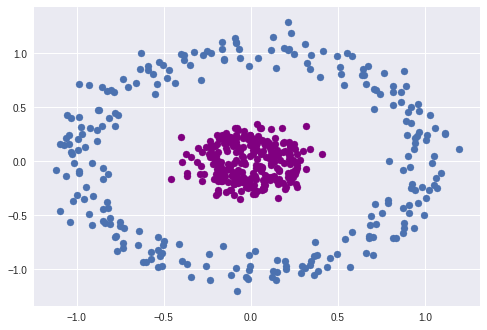

In [66]:
#writing the 0s and 1s
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], color='purple')

In [0]:
model = Sequential()
#Hidden layer with 4 neurons, and 2 inputs and the AF=sigmoid
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy',
              metrics=['accuracy'])

In [68]:
#history
h = model.fit(x=X, y=y, verbose = 1, 
          batch_size = 20, epochs=100, shuffle='true') 

Epoch 1/100
500/500 [==============================] - 0s 493us/step - loss: 0.6960 - acc: 0.5120
Epoch 2/100
500/500 [==============================] - 0s 55us/step - loss: 0.6938 - acc: 0.6220
Epoch 3/100
500/500 [==============================] - 0s 60us/step - loss: 0.6926 - acc: 0.5120
Epoch 4/100
500/500 [==============================] - 0s 62us/step - loss: 0.6916 - acc: 0.6820
Epoch 5/100
500/500 [==============================] - 0s 59us/step - loss: 0.6905 - acc: 0.6340
Epoch 6/100
500/500 [==============================] - 0s 60us/step - loss: 0.6890 - acc: 0.3580
Epoch 7/100
500/500 [==============================] - 0s 57us/step - loss: 0.6866 - acc: 0.6540
Epoch 8/100
500/500 [==============================] - 0s 54us/step - loss: 0.6838 - acc: 0.6760
Epoch 9/100
500/500 [==============================] - 0s 67us/step - loss: 0.6795 - acc: 0.7640
Epoch 10/100
500/500 [==============================] - 0s 55us/step - loss: 0.6732 - acc: 0.8040
Epoch 11/100
500/500 [======

Text(0.5, 1.0, 'accuracy')

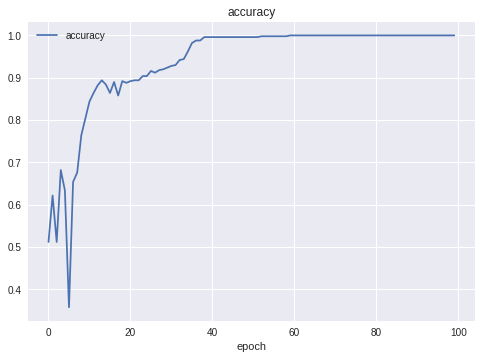

In [69]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

We can see our data set **more complex** than linear seperated data

Text(0.5, 1.0, 'loss')

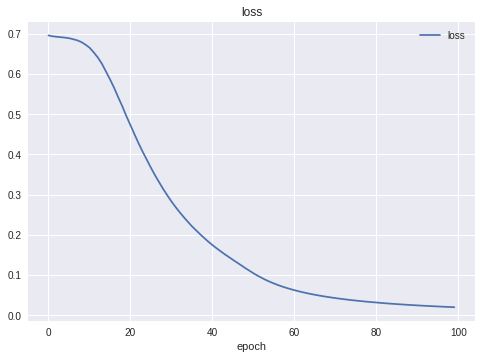

In [70]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [0]:
def plot_decision_boundary(X, y, model):
  #equally space between the elements
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

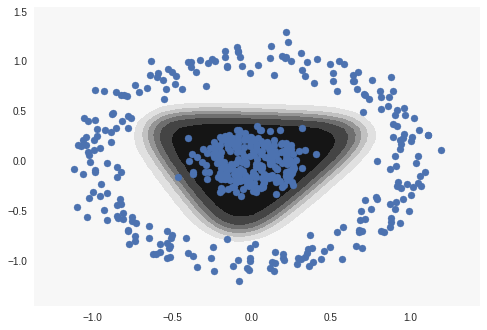

In [72]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.02524362]]


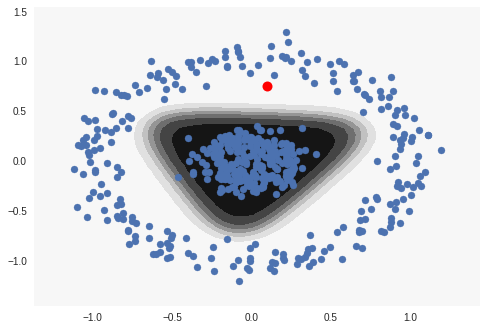

In [76]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 0.1
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is:", prediction)

Prediction is: [[0.9900087]]


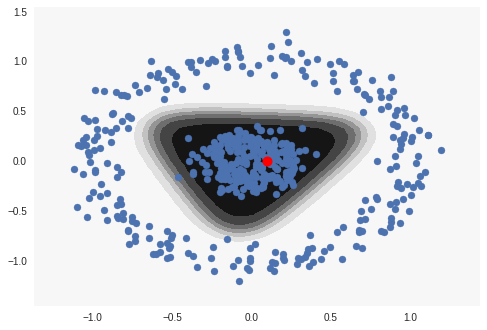

In [77]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is:", prediction)